### Date:March 2022


<h1> DSI Module 2 Twist challenge </h1>


<h1> Beijing Multisite Air Quality Machine Learing Model's </h1> 

<h1> 1. Introduction </h1>

#### Context: Exploring Air Pollutants in Beijing
PM2.5 readings are often included in air quality reports from environmental authorities and companies. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution.

#### Content
This data set includes  air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. <br/>
The time period is from March 1st, 2013 to February 28th, 2017.

#### Acknowledgements
Zhang, S., Guo, B., Dong, A., He, J., Xu, Z. and Chen, S.X. (2017) Cautionary Tales on Air-Quality Improvement in Beijing. Proceedings of the Royal Society A, Volume 473, No. 2205, Pages 20170457.

The files were downloaded from the UCI Machine Learning Repository and have not been modified.<br/>
https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data


### Problem Statement:

The pollutant that affects people the most is particulate matter, usually abbreviated as PM and used as a measure of air pollution. Although particles with a diameter of 10 microns or less (≤PM10) can penetrate and embed deep in the lungs, the ones that are more harmful to health are those with a diameter of 2.5 microns or less (≤PM2.5).

The model uses linear regression to predict the concentration of PM2.5 using the values of other air quality indices and conditions.

<h1> 2. Import Libraries</h1>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Read system file path of data set to load the path
import os

# import 'Numpy' 
import numpy as np # linear algebra
# import 'Pandas' 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels 
import statsmodels.api as sm
import statsmodels.stats.api as stats
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from datetime import datetime, timedelta


# import various functions from scipy
import scipy as sci
from scipy import stats as scistats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#!pip install dash
import pandas as pd
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output  # pip install dash (version 2.0.0 or higher)

import sqlite3
import csv

<h1> 3. Data Scrapping</h1>

In [109]:
# importing necessary modules
import requests, zipfile
from io import BytesIO
print('Downloading started')

#Defining the zip file URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('Documents/Technology sub/Data Science/Python/')

#### DATA SET DETAILS:

=======================================================================<br/>
**1. No:** 		Row number                              <br/>
**2. year:** 	Year of data in this row                <br/>
**3. month:** 	Month of data in this row               <br/>
**4. day:** 	Day of data in this row                 <br/>
**5. hour:** 	Hour of data in this row                <br/>
**6. PM2.5:** 	PM2.5 concentration (ug/m^3)            <br/>
**7. PM10:** 	PM10 concentration (ug/m^3)             <br/>
**8. SO2:** 	SO2 concentration (ug/m^3)              <br/>
**9. NO2:** 	NO2 concentration (ug/m^3)              <br/>
**10. CO:** 	CO concentration (ug/m^3)           	<br/>
**11. O3:** 	O3 concentration (ug/m^3)           	<br/>
**12. TEMP:** 	Temperature (degree Celsius)            <br/>
**13. PRES:** 	Pressure (hPa)                          <br/>
**14. DEWP:** 	Dew point temperature (degree Celsius)  <br/>
**15. RAIN:** 	Precipitation (mm)                      <br/>
**16. wd:** 		Wind direction                      <br/>
**17. WSPM:** 	Wind speed (m/s)                        <br/>
**18. station:**	Name of the air-quality monitoring site <br/>

==========================================================================

### The process followed is highlighted below:

**1. Data Cleaning** - Noise detection and removal<br/>
**2. Subjective analysis** - Using our intuition to evaluate a data variable/feature and 
        decide whether a variable influences the popularity of the article or not.<br/>
**3. Quantitative Analysis** - How correct is our intuition? 
      Here we carry our several analysis to accept or debunk our initial hypothesis<br/>
**4. Normal Distribuiton Observation on the dataset**<br/>
**5. Feature Selection and Evaluation**<br/>
**6. Machine Learning Classification**<br/>
**7. Summary and Conclusion**<br/>

<h1> 4. Load data</h1>

In [139]:
 #Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
df_AQI1 = pd.DataFrame()
df_AQI2 = pd.DataFrame()
count = 0
for dirname, _, filenames in os.walk('Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228'):

    for filename in filenames:
        path = os.path.join(dirname, filename) 

        print('File path : ',path)
        if count == 0:
            df_AQI2 = pd.read_csv(path, encoding="utf-8")
            df_AQI1 = df_AQI1.append(df_AQI2)
            count = 1
            continue
            
        df_AQI2 = pd.read_csv(path, encoding="utf-8")
        df_AQI1 = df_AQI.append(df_AQI2)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Changping_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Dingling_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Dongsi_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Guanyuan_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Gucheng_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Huairou_20130301-20170228.csv
File path :  Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228\PRSA_Data_Nongzhanguan_2

<h1> 5. Exploratory Data Analysis</h1>

In [141]:
#df_AQI1 = pd.DataFrame()
df_AQI1.head()

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,PM10,No,wd
0,2013,NaN,1,0,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,4.400000,Aotizhongxin,91.000000,NaN,NaN
1,2013,NaN,1,1,8.000000,4.000000,7.000000,300.000000,77.000000,-1.100000,1023.200000,-18.200000,0.000000,4.700000,Aotizhongxin,91.000000,NaN,NaN
2,2013,NaN,1,2,7.000000,5.000000,10.000000,300.000000,73.000000,-1.100000,1023.500000,-18.200000,0.000000,5.600000,Aotizhongxin,91.000000,NaN,NaN
3,2013,NaN,1,3,6.000000,11.000000,11.000000,300.000000,72.000000,-1.400000,1024.500000,-19.400000,0.000000,3.100000,Aotizhongxin,91.000000,NaN,NaN
4,2013,NaN,1,4,3.000000,12.000000,12.000000,300.000000,72.000000,-2.000000,1025.200000,-19.500000,0.000000,2.000000,Aotizhongxin,91.000000,NaN,NaN


In [142]:
import calendar
d = dict(enumerate(calendar.month_abbr))
df_AQI=df_AQI1.copy()
df_AQI['month'] = df_AQI['month'].map(d)

<h2> 5.1. Check Data</h2>

In [143]:
df_AQI.head()

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,PM10,No,wd
0,2013,NaN,1,0,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,4.400000,Aotizhongxin,91.000000,NaN,NaN
1,2013,NaN,1,1,8.000000,4.000000,7.000000,300.000000,77.000000,-1.100000,1023.200000,-18.200000,0.000000,4.700000,Aotizhongxin,91.000000,NaN,NaN
2,2013,NaN,1,2,7.000000,5.000000,10.000000,300.000000,73.000000,-1.100000,1023.500000,-18.200000,0.000000,5.600000,Aotizhongxin,91.000000,NaN,NaN
3,2013,NaN,1,3,6.000000,11.000000,11.000000,300.000000,72.000000,-1.400000,1024.500000,-19.400000,0.000000,3.100000,Aotizhongxin,91.000000,NaN,NaN
4,2013,NaN,1,4,3.000000,12.000000,12.000000,300.000000,72.000000,-2.000000,1025.200000,-19.500000,0.000000,2.000000,Aotizhongxin,91.000000,NaN,NaN


In [120]:
df_AQI.describe()

,year,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM10,No
count,490896.000000,490896.000000,490896.000000,490200.000000,490227.000000,490142.000000,489599.000000,489818.000000,490877.000000,490877.000000,490877.000000,490877.000000,490883.000000,490412.000000,35064.000000
mean,2014.662560,15.729637,11.500000,80.049674,15.841194,51.323890,1235.164902,56.851153,13.574846,1010.855896,2.521753,0.064400,1.731717,93.993023,17532.500000
std,1.177198,8.800101,6.922194,80.886575,21.815537,34.802267,1146.220963,55.923842,11.424344,10.486951,13.775318,0.817274,1.240365,37.385889,10122.249256
min,2013.000000,1.000000,0.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2.000000,1.000000
25%,2014.000000,8.000000,5.750000,21.000000,3.000000,24.000000,500.000000,11.000000,3.200000,1002.300000,-8.800000,0.000000,0.900000,91.000000,8766.750000
50%,2015.000000,16.000000,11.500000,55.000000,7.000000,45.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,91.000000,17532.500000
75%,2016.000000,23.000000,17.250000,110.000000,19.000000,71.000000,1500.000000,80.000000,23.300000,1019.100000,15.100000,0.000000,2.200000,91.000000,26298.250000
max,2017.000000,31.000000,23.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,961.000000,35064.000000


In [121]:
df_AQI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490896 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     490896 non-null  int64  
 1   month    35064 non-null   object 
 2   day      490896 non-null  int64  
 3   hour     490896 non-null  int64  
 4   PM2.5    490200 non-null  float64
 5   SO2      490227 non-null  float64
 6   NO2      490142 non-null  float64
 7   CO       489599 non-null  float64
 8   O3       489818 non-null  float64
 9   TEMP     490877 non-null  float64
 10  PRES     490877 non-null  float64
 11  DEWP     490877 non-null  float64
 12  RAIN     490877 non-null  float64
 13  WSPM     490883 non-null  float64
 14  station  490896 non-null  object 
 15  PM10     490412 non-null  float64
 16  No       35064 non-null   float64
 17  wd       34985 non-null   object 
dtypes: float64(12), int64(3), object(3)
memory usage: 71.2+ MB


<a id='quantitative'></a>
### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;"> Quantitative Variable:Numerical Data Details

In [122]:
df_Quantitative = df_AQI.select_dtypes(exclude='object')
df_Quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490896 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    490896 non-null  int64  
 1   day     490896 non-null  int64  
 2   hour    490896 non-null  int64  
 3   PM2.5   490200 non-null  float64
 4   SO2     490227 non-null  float64
 5   NO2     490142 non-null  float64
 6   CO      489599 non-null  float64
 7   O3      489818 non-null  float64
 8   TEMP    490877 non-null  float64
 9   PRES    490877 non-null  float64
 10  DEWP    490877 non-null  float64
 11  RAIN    490877 non-null  float64
 12  WSPM    490883 non-null  float64
 13  PM10    490412 non-null  float64
 14  No      35064 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 59.9 MB


<a id='qualitative'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">Qualitative Variable:Categorical Data Details

In [123]:
df_Qualitative = df_AQI.select_dtypes(exclude=np.number)
df_Qualitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490896 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   month    35064 non-null   object
 1   station  490896 non-null  object
 2   wd       34985 non-null   object
dtypes: object(3)
memory usage: 15.0+ MB


<h2> 5.2 data Cleaning</h2>

columns with missing values

In [124]:
df_AQI.isna().sum().sum()

1372642

In [82]:
# percentage of missing values in each column
round(df_AQI.isnull().sum()/len(df_AQI.index), 2)*100

year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
WSPM       0.000000
station    0.000000
No        92.000000
PM10      92.000000
wd        92.000000
dtype: float64

<table width=100%>
    <tr>
        <td>
            <div align="left">
                <font size=4px>
                    <b> <h3>Imputing Missing Values</h3></b>
                </font>
            </div>
        </td>
        <td width="20%">
            <div align="rigth">
            <img src="https://th.bing.com/th/id/OIP.bgivqnU_a21HC0KMmWbMmQHaF7?pid=ImgDet&rs=1">
            </div
        </td><br/>
  
</table>

In [83]:
df_AQI['PM2.5'].fillna(df_AQI['PM2.5'].median(), inplace=True)
df_AQI['PM10'].fillna(df_AQI['PM10'].median(), inplace=True)
df_AQI['SO2'].fillna(df_AQI['SO2'].median(), inplace=True)
df_AQI['NO2'].fillna(df_AQI['NO2'].mean(), inplace=True)
df_AQI['CO'].fillna(df_AQI['CO'].median(), inplace=True)
df_AQI['O3'].fillna(df_AQI['O3'].median(), inplace=True)
df_AQI['TEMP'].fillna(df_AQI['TEMP'].median(), inplace=True)
df_AQI['PRES'].fillna(df_AQI['PRES'].median(), inplace=True)
df_AQI['DEWP'].fillna(df_AQI['DEWP'].mean(), inplace=True)
df_AQI['RAIN'].fillna(df_AQI['RAIN'].median(), inplace=True)
df_AQI['WSPM'].fillna(df_AQI['WSPM'].median(), inplace=True)

In [84]:
round(df_AQI.isnull().sum()/len(df_AQI.index), 2)*100

year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
WSPM       0.000000
station    0.000000
No        92.000000
PM10       0.000000
wd        92.000000
dtype: float64

In [85]:
df_AQI = df_AQI.drop(['wd', 'No'], axis=1)
df_AQI.isna().sum().sum()

0

<a id='summary_stats'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Summary Statistics

In [86]:
df_AQI.drop(['year','month','day','hour'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,455832.000000,79.674619,80.477443,2.000000,21.000000,55.000000,110.000000,999.000000
SO2,455832.000000,15.742543,21.643531,0.285600,3.000000,7.000000,19.000000,500.000000
NO2,455832.000000,51.007334,34.704806,1.026500,24.000000,45.000000,71.000000,290.000000
CO,455832.000000,1225.147361,1139.679908,100.000000,500.000000,900.000000,1500.000000,10000.000000
O3,455832.000000,56.897473,55.836262,0.214200,11.000000,45.000000,80.000000,1071.000000
TEMP,455832.000000,13.558729,11.427204,-19.900000,3.200000,14.500000,23.300000,41.600000
PRES,455832.000000,1010.805469,10.478779,982.400000,1002.300000,1010.400000,1019.000000,1042.800000
DEWP,455832.000000,2.507477,13.780687,-43.400000,-8.900000,3.000000,15.100000,29.100000
RAIN,455832.000000,0.064406,0.818814,0.000000,0.000000,0.000000,0.000000,72.500000
WSPM,455832.000000,1.730671,1.242937,0.000000,0.900000,1.400000,2.200000,13.200000


### Check Standard Deviation is Zero, if any remove from the analysis

In [87]:
df_AQI.std()

year       1.177198
day        8.800102
hour       6.922194
PM2.5     80.477443
SO2       21.643531
NO2       34.704806
CO      1139.679908
O3        55.836262
TEMP      11.427204
PRES      10.478779
DEWP      13.780687
RAIN       0.818814
WSPM       1.242937
PM10      27.460789
dtype: float64

**Interpretation:** There are no zero standard devition of given data set

<a id="outlier"></a>
#### Outlier Analysis and Treatment for all features

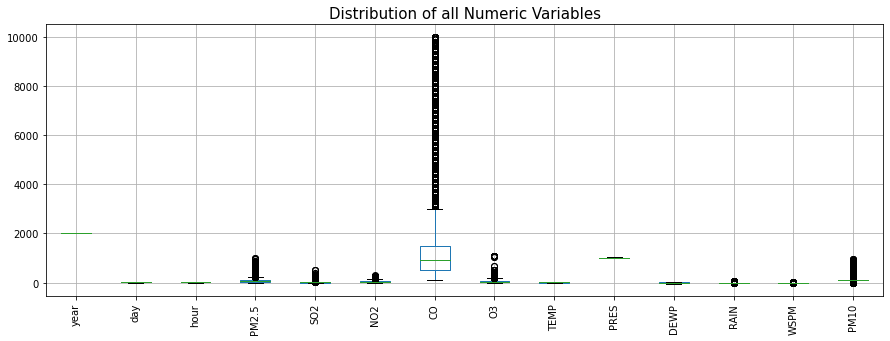

In [88]:
data = df_AQI.copy()
data = data.select_dtypes(exclude='object')
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
data.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

### Correlation between features and ploting Heat map:

Multi-Collinearity Feature:: NO2 &  PM2.5 :-> Correlation Score 0.6608
Multi-Collinearity Feature:: NO2 &  CO :-> Correlation Score 0.6912
Multi-Collinearity Feature:: CO &  PM2.5 :-> Correlation Score 0.7697
Multi-Collinearity Feature:: CO &  SO2 :-> Correlation Score 0.5265
Multi-Collinearity Feature:: CO &  NO2 :-> Correlation Score 0.6912
Multi-Collinearity Feature:: TEMP &  O3 :-> Correlation Score 0.5875
Multi-Collinearity Feature:: TEMP &  DEWP :-> Correlation Score 0.8199


<AxesSubplot:>

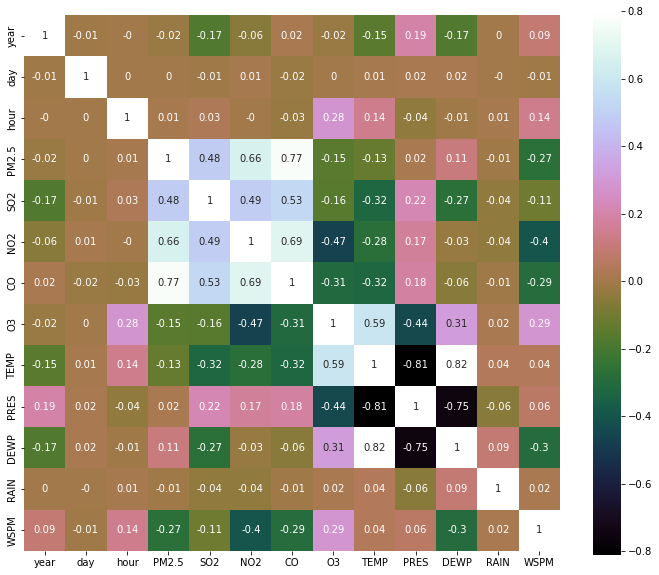

In [89]:
import seaborn as sns
data = df_AQI.select_dtypes(exclude='object').copy()
data = data.drop(['PM10'],axis=1)
corrmat = data.select_dtypes(exclude='object').corr()
f, ax = plt.subplots(figsize=(12, 10))

dupl_key_values = list()
for i in range(len(corrmat.columns)):
  for j in range(len(corrmat.index)):
    if corrmat.iloc[i,j]>0.50 and corrmat.iloc[i,j] != 1.0:
        if i not in dupl_key_values or j in dupl_key_values:
            dupl_key_values.append(j)
        if i in dupl_key_values or j not in dupl_key_values:
            dupl_key_values.append(i)
            print('Multi-Collinearity Feature:: {} &  {} :-> Correlation Score {}'.format(corrmat.columns[i],corrmat.columns[j],round(corrmat.iloc[i,j],4)))

sns.heatmap(round(corrmat, 2), vmax=.8, square=True, annot=True,cmap='cubehelix')

#### Interpretation: Relatively high correlation seen among CO, NO2, SO2 and PM2.5 and also between O3 and temp.

##### #Correlation Score#
1. NO2 &  PM2.5 :-> 0.658
2. Multi-Collinearity Feature:: NO2 &  CO :-> 0.6869
3. Multi-Collinearity Feature:: CO &  PM2.5 :-> 0.7672
4. Multi-Collinearity Feature:: CO &  SO2 :-> 0.5235
5. Multi-Collinearity Feature:: CO &  NO2 :-> 0.6869
6. Multi-Collinearity Feature:: TEMP &  O3 :-> 0.5858
7. Multi-Collinearity Feature:: TEMP &  DEWP :-> 0.8201


**Subsequent models might have high Multicolinearity behavior**

### Yearly Analysis of Different Pollutants

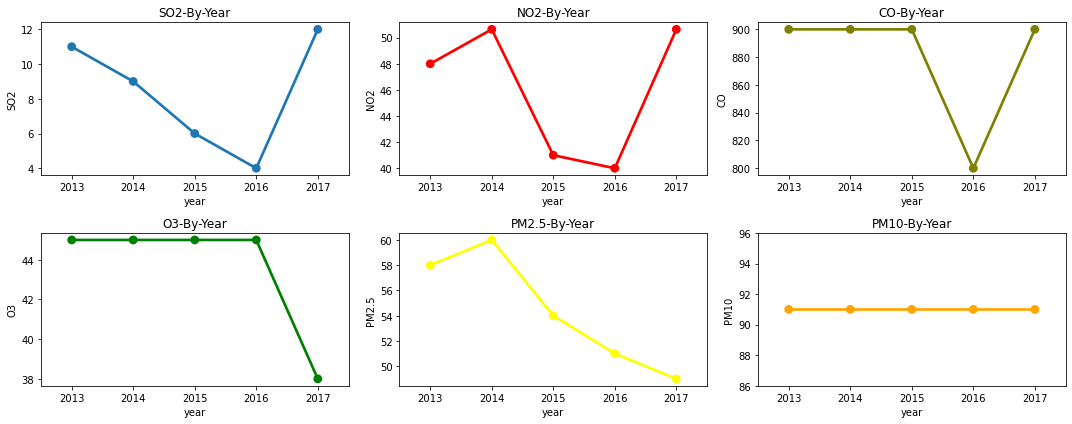

In [90]:
df = df_AQI[['SO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
fig,ax=plt.subplots(2, 3,figsize=(15,6))
ax[0, 0].set_title('SO2-By-Year')
sns.pointplot(ax= ax[0,0],x='year', y='SO2', data=df)

df = df_AQI[['NO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 1].set_title('NO2-By-Year')
sns.pointplot(ax= ax[0,1], x='year', y='NO2', data=df,markers='o', color='red')

df = df_AQI[['CO','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 2].set_title('CO-By-Year')
sns.pointplot(ax= ax[0,2],x='year', y='CO', data=df,markers='o', color='olive')

df = df_AQI[['O3','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 0].set_title('O3-By-Year')
sns.pointplot(ax=ax[1, 0], x='year', y='O3', data=df,markers='o', color='green')


df = df_AQI[['PM2.5','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 1].set_title('PM2.5-By-Year')
sns.pointplot(ax=ax[1, 1],x='year', y='PM2.5', data=df,markers='o', color='yellow')


df = df_AQI[['PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 2].set_title('PM10-By-Year')
sns.pointplot(ax=ax[1,2], x='year', y='PM10', data=df,markers='o', color='orange')
fig.tight_layout()

**Interpretation:** <br/>

From the above plots:<br/>
By the end of 2017 fine particulate pollution (PM2. 5) fell by 35% and by 25% in the surrounding Beijing-Tianjin-Hebei region. Much of this reduction came from measures to control coal-fired boilers, provide cleaner domestic fuels, and industrial restructuring
https://www.ccacoalition.org/en/news/beijing%E2%80%99s-air-quality-improvements-are-model-other-cities#:~:text=By%20the%20end%20of%202017,domestic%20fuels%2C%20and%20industrial%20restructuring.

### Hourly Analysis of Pollutants in 2017

In [91]:
df_2017 = df_AQI[df_AQI['year']==2017]

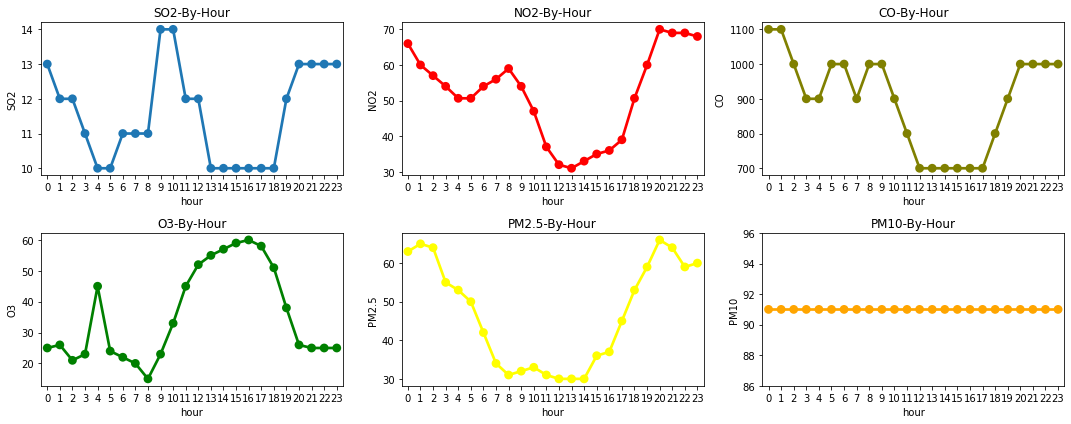

In [92]:
df = df_2017[['SO2','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
fig,ax=plt.subplots(2, 3, figsize=(15,6))
ax[0, 0].set_title('SO2-By-Hour')
sns.pointplot(ax=ax[0,0],x='hour', y='SO2', data=df)

df = df_2017[['NO2','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[0, 1].set_title('NO2-By-Hour')
sns.pointplot(ax= ax[0,1], x='hour', y='NO2', data=df,markers='o', color='red')

df = df_2017[['CO','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[0, 2].set_title('CO-By-Hour')
sns.pointplot(ax= ax[0,2],x='hour', y='CO', data=df,markers='o', color='olive')

df = df_2017[['O3','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 0].set_title('O3-By-Hour')
sns.pointplot(ax=ax[1, 0], x='hour', y='O3', data=df,markers='o', color='green')

df = df_2017[['PM2.5','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 1].set_title('PM2.5-By-Hour')
sns.pointplot(ax=ax[1, 1],x='hour', y='PM2.5', data=df,markers='o', color='yellow')

df = df_2017[['PM10','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 2].set_title('PM10-By-Hour')
sns.pointplot(ax=ax[1,2], x='hour', y='PM10', data=df,markers='o', color='orange')

fig.tight_layout()

**Interpretation:** <br/>

From the above plots:<br/>
The day of busines end hours (9:00 AM to 7:00 PM) we can easily find the Polutant gases contributing more to PM2.5

### Analysis of Pollutants in day of the week

In [126]:
df_AQI1.head()

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,PM10,No,wd
0,2013,Mar,1,0,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,4.400000,Aotizhongxin,91.000000,NaN,NaN
1,2013,Mar,1,1,8.000000,4.000000,7.000000,300.000000,77.000000,-1.100000,1023.200000,-18.200000,0.000000,4.700000,Aotizhongxin,91.000000,NaN,NaN
2,2013,Mar,1,2,7.000000,5.000000,10.000000,300.000000,73.000000,-1.100000,1023.500000,-18.200000,0.000000,5.600000,Aotizhongxin,91.000000,NaN,NaN
3,2013,Mar,1,3,6.000000,11.000000,11.000000,300.000000,72.000000,-1.400000,1024.500000,-19.400000,0.000000,3.100000,Aotizhongxin,91.000000,NaN,NaN
4,2013,Mar,1,4,3.000000,12.000000,12.000000,300.000000,72.000000,-2.000000,1025.200000,-19.500000,0.000000,2.000000,Aotizhongxin,91.000000,NaN,NaN


In [125]:
# creating date field for further analysis by extracting day of the week, month etc.
df_2017 = df_AQI1[df_AQI1['year']==2017]
df_2017['date']=pd.to_datetime(df_2017[['year', 'month', 'day']])

ValueError: Unable to parse string "Jan" at position 0

In [ ]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [ ]:
df_2017['day_week'] = df_2017['date'].apply(lambda x: findDay(x))

In [ ]:
custom_day = {'Monday':0, 'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

In [ ]:
df = df_2017[['SO2','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
fig,ax=plt.subplots(2,3, figsize=(15,5))
ax[0, 0].set_title('SO2-By-day_week')
sns.pointplot(ax=ax[0,0],x='day_week', y='SO2',markers='o', data=df)

df = df_2017[['NO2','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[0, 1].set_title('NO2-By-day_week')
sns.pointplot(ax= ax[0,1], x='day_week', y='NO2', data=df,markers='o', color='red')

df = df_2017[['CO','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[0, 2].set_title('CO-By-day_week')
sns.pointplot(ax= ax[0,2],x='day_week', y='CO', data=df, color='olive')

df = df_2017[['O3','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 0].set_title('O3-By-day_week')
sns.pointplot(ax=ax[1, 0], x='day_week', y='O3', data=df,markers='o', color='green')

df = df_2017[['PM2.5','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 1].set_title('PM2.5-By-day_week')
sns.pointplot(ax=ax[1, 1],x='day_week', y='PM2.5', data=df,markers='o', color='yellow')

df = df_2017[['PM10','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 2].set_title('PM10-By-day_week')
sns.pointplot(ax=ax[1,2], x='day_week', y='PM10', data=df, markers='o', color='orange')

fig.tight_layout()

**Interpretation:** <br/>

From the above plots:<br/>
During week days Co, NO2, SO2 Polutant gases contributing more to PM2.5

### Analysis of Pollutants month wise wrt to station

In [ ]:
df_mon = df_AQI.copy()
#converting month values to month name for better understanding
df_mon.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)

In [ ]:
#Assign the year to numeric number
custom_dict = {'Jan':0, 'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11}

In [ ]:
df = df_mon[['SO2','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
df = df.iloc[df['month'].map(custom_dict).argsort()]
fig,ax=plt.subplots(2,3, figsize=(15,5))
ax[0, 0].set_title('SO2-By-month')
sns.pointplot(ax= ax[0,0], x='month', y='SO2', data=df)

df = df_mon[['NO2','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[0, 1].set_title('NO2-By-month')
sns.pointplot(ax= ax[0,1], x='month', y='NO2', data=df,markers='o', color='red')

df = df_mon[['CO','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[0, 2].set_title('CO-By-month')
sns.pointplot(ax= ax[0,2],x='month', y='CO', data=df,markers='o', color='olive')

df = df_mon[['O3','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 0].set_title('O3-By-month')
sns.pointplot(ax=ax[1, 0], x='month', y='O3', data=df,markers='o', color='green')

df = df_mon[['PM2.5','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 1].set_title('PM2.5-By-month')
sns.pointplot(ax=ax[1, 1],x='month', y='PM2.5', data=df,markers='o', color='yellow')

df = df_mon[['PM10','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 2].set_title('PM10-By-month')
sns.pointplot(ax=ax[1,2], x='month', y='PM10', data=df,markers='o', color='orange')

fig.tight_layout()

<h1> 5. Model Building and Analysis</h1>

### Using Linear Regression

In [ ]:
df_AQI = df_AQI.drop(['PM10'], axis=1)
df_AQI.head(1)

In [ ]:
#Keep original Dat frame after data cleaning and the imputing null value.
#copy the data frame for Model building analysis
df_md1 = df_AQI.copy()
df_md1.head(1)

<a id="types"></a>
#### Types of Transformations ##### Split the data into training and test sets.

In [ ]:
#Add constant in to the data frame for the intercept -NA
# df = sm.add_constant(df)
# SPlit data n
df_md1 = df_AQI.copy()
X= df_md1.drop(['PM2.5','station','year'], axis=1)
X= sm.add_constant(X)
Y =df_md1['PM2.5']

X_train , X_test, y_train,y_test = train_test_split( X, Y, test_size = 0.2)

print(X_train.shape , X_test.shape, y_train.shape,y_test.shape)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=3)
reg_cv_score = cross_val_score(model, X,Y, cv=cv)
reg_cv_mse = cross_val_score(model, X,Y, cv=cv,scoring='neg_mean_squared_error')
R2 = np.mean(reg_cv_score)
RMSE = np.sqrt(np.abs(np.mean(reg_cv_mse)))
print('R2 :',R2)
print('RMSE :',RMSE)

In [ ]:
cv_summary_1_2 = pd.DataFrame({'CV Name':['LINEAR REGRESSION'],'R-Square':[R2],'RMSE':[RMSE]})
cv_summary_1_2

### save Model to file

In [ ]:
import pickle
filename = 'LR_Beijing_model.sav'
pickle.dump(model, open(filename, 'wb'))

<h1> 6. Save Dataframe to sqlite3 database </h1>

In [94]:
conn = sqlite3.connect('df_AQIs')
c = conn.cursor()

In [95]:
c.execute('''DROP TABLE IF EXISTS data''')
c.execute('''CREATE TABLE data (No, year, month, day, hour, 'PM2.5', PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station)''')
conn.commit()

In [96]:
df_AQI.to_sql('data', conn, if_exists='replace', index = False)

In [97]:
pd.read_sql('''SELECT * FROM data''',conn).describe()

,year,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM10
count,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000
mean,2014.662560,15.729637,11.500000,79.674619,15.742543,51.007334,1225.147361,56.897473,13.558729,1010.805469,2.507477,0.064406,1.730671,92.610039
std,1.177198,8.800102,6.922194,80.477443,21.643531,34.704806,1139.679908,55.836262,11.427204,10.478779,13.780687,0.818814,1.242937,27.460789
min,2013.000000,1.000000,0.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2.000000
25%,2014.000000,8.000000,5.750000,21.000000,3.000000,24.000000,500.000000,11.000000,3.200000,1002.300000,-8.900000,0.000000,0.900000,91.000000
50%,2015.000000,16.000000,11.500000,55.000000,7.000000,45.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,91.000000
75%,2016.000000,23.000000,17.250000,110.000000,19.000000,71.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,91.000000
max,2017.000000,31.000000,23.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,961.000000


In [98]:
pd.read_sql('''SELECT * FROM data''',conn).head()

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,PM10
0,2013,Mar,1,0,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,4.400000,Aotizhongxin,91.000000
1,2013,Mar,1,1,8.000000,4.000000,7.000000,300.000000,77.000000,-1.100000,1023.200000,-18.200000,0.000000,4.700000,Aotizhongxin,91.000000
2,2013,Mar,1,2,7.000000,5.000000,10.000000,300.000000,73.000000,-1.100000,1023.500000,-18.200000,0.000000,5.600000,Aotizhongxin,91.000000
3,2013,Mar,1,3,6.000000,11.000000,11.000000,300.000000,72.000000,-1.400000,1024.500000,-19.400000,0.000000,3.100000,Aotizhongxin,91.000000
4,2013,Mar,1,4,3.000000,12.000000,12.000000,300.000000,72.000000,-2.000000,1025.200000,-19.500000,0.000000,2.000000,Aotizhongxin,91.000000


<h1> 7. Create Dashboard using Plotly Dash </h1>

In [103]:
#!pip install dash
#!pip install jupyter-dash
import dash
from jupyter_dash import JupyterDash
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output  # pip install dash (version 2.0.0 or higher)

In [ ]:
# df = px.data.gapminder()
df = pd.read_sql('''SELECT * FROM data''',conn)
df_year = df.groupby(['year']).mean()
df_month = df.groupby(['month']).mean()
df_day = df.groupby(['day']).mean()
df_hour = df.groupby(['hour']).mean()
df_station = df.groupby(['station']).mean()

df.reset_index(inplace=True)
print(df_year[:15])
print(df_month[:15])
print(df_day[:15])
print(df_hour[:15])
print(df_station[:15])

df.reset_index(inplace=True)
print(df[:5])
#df = df_AQI
year_options = [dict(label=x, value=x) for x in df['year'].unique()]
month_options = [dict(label=x, value=x) for x in df['month'].unique()]
day_options = [dict(label=x, value=x) for x in df['day'].unique()]
hour_options = [dict(label=x, value=x) for x in df['hour'].unique()]
station_options = [dict(label=x, value=x) for x in df['station'].unique()]

app = JupyterDash(__name__)


# # -- Import and clean data (importing csv into pandas)
# # df = pd.read_csv("intro_bees.csv")
# df = pd.read_sql('''SELECT * FROM data''',conn)

# df = df.groupby(['year', 'PM2.5', 'SO2', 'NO2'])[['station']].mean()
# df.reset_index(inplace=True)
# print(df[:5])


# ------------------------------------------------------------------------------
# App layout
app.layout = html.Div(children = [
    html.H1("Beijing Air Quality index", style={'text-align': 'center'}),
    dcc.Dropdown(id="year",
                 options=year_options,
                 multi=True,
                 value=2017,
                 style={'width': "40%"}
                 ),
    dcc.Dropdown(id="month",
                 options=month_options,
                 multi=True,
                 value=Jan,
                 style={'width': "40%"}
                 ),
    dcc.Dropdown(id="day",
                 options=day_options,
                 multi=True,
                 value=1,
                 style={'width': "40%"}
                 ),
    dcc.Dropdown(id="hour",
                 options=hour_options,
                 multi=True,
                 value=0,
                 style={'width': "40%"}
                 ),
    dcc.Dropdown(id="station",
                 options=station_options,
                 multi=True,
                 value=Aotizhongxin,
                 style={'width': "40%"}
                 ),
    dcc.Graph(id="graph1", figure={}),
    dcc.Graph(id="graph2", figure={}),
    dcc.Graph(id="graph3", figure={})
])

    
#     html.Div(id='output_container', children=[]),
#     html.Br(),

    
#     dcc.Graph(id='my_bee_map', figure={})])


# ------------------------------------------------------------------------------
# Connect the Plotly graphs with Dash Components
@app.callback(Output(component_id='graph1', component_property='figure'),
              [Input(component_id='year', component_property='value')])
     
def egraph(year):
     year = year if year else 2017
     df_year = df.query("year == @year")
     return px.bar (df_year, x="PM2.5", y="SO2", log_x=False, color="station", barmode="group", 
                        title="f'Plot of {x} vs {y} for {year}")
    
@app.callback(Output(component_id='graph2', component_property='figure'),
              [Input(component_id='month', component_property='value')])
     
def egraph(year):
     year = year if year else 2017
     df_month = df.query("month == @month")
     return px.scatter (df_year, x="PM2.5", y="CO", log_x=False, color="station")
    
@app.callback(Output(component_id='graph3', component_property='figure'),
              [Input(component_id='year', component_property='value')])
     
def egraph(year):
     year = year if year else 2017
     df_year = df.query("year == @year")
     return px.bar (df_year, x="PM2.5", y="NO2", log_x=False, color="station")

app.run_server(mode="jupyterlab")
  
#     container = "The year chosen by user was: {}".format(option_slctd)

    
#     dff = df.copy()
#     dff = dff[dff["Year"] == option_slctd]
#     dff = dff[dff["Affected by"] == "Varroa_mites"]

    
#     # Plotly Express
#     fig = px.choropleth(
#         data_frame=dff,
#         locationmode='USA-states',
#         locations='state_code',
#         scope="usa",
#         color='Pct of Colonies Impacted',
#         hover_data=['State', 'Pct of Colonies Impacted'],
#         color_continuous_scale=px.colors.sequential.YlOrRd,
#         labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
#         template='plotly_dark'
#     )

    
    # Plotly Graph Objects (GO)
    # fig = go.Figure(
    #     data=[go.Choropleth(
    #         locationmode='USA-states',
    #         locations=dff['state_code'],
    #         z=dff["Pct of Colonies Impacted"].astype(float),
    #         colorscale='Reds',
    #     )]
    # )
    #
    # fig.update_layout(
    #     title_text="Bees Affected by Mites in the USA",
    #     title_xanchor="center",
    #     title_font=dict(size=24),
    #     title_x=0.5,
    #     geo=dict(scope='usa'),
    # )

    
#     return container, 

In [46]:
app = Dash(__name__)


# -- Import and clean data (importing csv into pandas)
# df = pd.read_csv("intro_bees.csv")
df = pd.read_sql('''SELECT * FROM data''',conn)

df = df.groupby(['year', 'PM2.5', 'SO2', 'NO2', 'station'])[['station']].mean()
df.reset_index(inplace=True)
print(df[:8])

   year    PM2.5      SO2       NO2    station
0  2013 2.000000 0.285600  1.847700  Changping
1  2013 2.000000 0.285600 45.371300  Changping
2  2013 2.000000 2.856000  1.642400    Huairou
3  2013 2.000000 3.000000 10.000000    Gucheng
4  2013 2.000000 3.000000 15.000000    Gucheng
5  2013 2.000000 3.000000 28.000000    Gucheng
6  2013 2.000000 7.000000 17.000000  Changping
7  2013 3.000000 0.285600  1.231800   Dingling


In [47]:
# App layout
app.layout = html.Div([

    
    html.H1("Beijing Air Quality Index", style={'text-align': 'center'}),

    
    dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2013", "value": 2013},
                     {"label": "2014", "value": 2014},
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017}],
                 multi=False,
                 value=2013,
                 style={'width': "40%"}
                 ),
  
    
    html.Div(id='output_container', children=[]),
    html.Br(),

    
    dcc.Graph(id='my_bee_map', figure={})
    
])

In [48]:
if __name__ == '__main__':
  app.enable_dev_tools(
  dev_tools_ui=True,
  dev_tools_serve_dev_bundles=True,
)

In [49]:
# Connect the Plotly graphs with Dash Components
dff = df.copy()
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))

    
    container = "The year chosen by user was: {}".format(option_slctd)

    
    #dff = df.copy()
    dff = dff[dff["Year"] == option_slctd]
    dff = dff[dff["Affected by"] == "Varroa_mites"]

In [50]:
  app.run_server()
  #app.run_server(debug=False, use_reloader=False)

In [51]:

app = Dash(__name__)


# -- Import and clean data (importing csv into pandas)
# df = pd.read_csv("intro_bees.csv")
df = pd.read_sql('''SELECT * FROM data''',conn)

df = df.groupby(['year', 'PM2.5', 'SO2', 'NO2'])[['station']].mean()
df.reset_index(inplace=True)
print(df[:5])


# ------------------------------------------------------------------------------
# App layout
app.layout = html.Div([

    
    html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),

    
    dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017},
                     {"label": "2018", "value": 2018}],
                 multi=False,
                 value=2015,
                 style={'width': "40%"}
                 ),

    
    html.Div(id='output_container', children=[]),
    html.Br(),

    
    dcc.Graph(id='my_bee_map', figure={})])


# ------------------------------------------------------------------------------
# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))

    
    container = "The year chosen by user was: {}".format(option_slctd)

    
    dff = df.copy()
    dff = dff[dff["Year"] == option_slctd]
    dff = dff[dff["Affected by"] == "Varroa_mites"]

    
    # Plotly Express
    fig = px.choropleth(
        data_frame=dff,
        locationmode='USA-states',
        locations='state_code',
        scope="usa",
        color='Pct of Colonies Impacted',
        hover_data=['State', 'Pct of Colonies Impacted'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
        template='plotly_dark'
    )

    
    # Plotly Graph Objects (GO)
    # fig = go.Figure(
    #     data=[go.Choropleth(
    #         locationmode='USA-states',
    #         locations=dff['state_code'],
    #         z=dff["Pct of Colonies Impacted"].astype(float),
    #         colorscale='Reds',
    #     )]
    # )
    #
    # fig.update_layout(
    #     title_text="Bees Affected by Mites in the USA",
    #     title_xanchor="center",
    #     title_font=dict(size=24),
    #     title_x=0.5,
    #     geo=dict(scope='usa'),
    # )

    
    return container, 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\obeng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\obeng\AppData\Local\Temp/ipykernel_13720/3761159113.py", line 6, in <module>
    df = pd.read_sql('''SELECT * FROM data''',conn)
  File "C:\Users\obeng\anaconda3\lib\site-packages\pandas\io\sql.py", line 602, in read_sql
    return pandas_sql.read_query(
  File "C:\Users\obeng\anaconda3\lib\site-packages\pandas\io\sql.py", line 2130, in read_query
    data = self._fetchall_as_list(cursor)
  File "C:\Users\obeng\anaconda3\lib\site-packages\pandas\io\sql.py", line 2144, in _fetchall_as_list
    result = cur.fetchall()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):



KeyboardInterrupt



In [ ]:
import os
# We start with the import of standard ML librairies
import pandas as pd
import math
from joblib import load
#from src.data_processing import make_full_pipeline
import pickle
# We add all Plotly and Dash necessary librairies
import dash
import plotly.graph_objects as go
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# HOME_PATH = os.getcwd()
# DATA_PATH = os.path.join(HOME_PATH, 'data')
# MODELS_PATH = os.path.join(HOME_PATH, 'model')
# ASSETS_PATH = os.path.join(HOME_PATH, 'assets')

# df = pd.read_csv(os.path.join(DATA_PATH, "Customer-Value-Analysis.csv")).set_index('Customer')
# sk_best = load(os.path.join(MODELS_PATH, 'best.joblib'))

df = pd.read_csv(os.path.join("Documents/Technology sub/Data Science/Python/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")).set_index('PM2.5')
sk_best = load(os.path.join("Documents/DSI_Python/Python notebooks/LR_Beijing_model.sav"))

# full_pipeline = load(os.path.join(MODELS_PATH, 'transformer.joblib'))
full_pipeline = make_full_pipeline(df)

ohe_path = os.path.join(MODELS_PATH, 'ohe_categories.pkl')
perfs_path = os.path.join(MODELS_PATH, 'sk_best_performances.pkl')

with open(ohe_path, 'rb') as input:
    ohe_categories = pickle.load(input)

categories = []
for k, l in ohe_categories.items():
    categories.append([f'{k}_{cat}' for cat in list(l)])
flatten = lambda l: [item for sublist in l for item in sublist]
categories = flatten(categories)

with open(perfs_path, 'rb') as input:
    perfs = pickle.load(input)
# scaling

cats = [var for var, var_type in df.dtypes.items() if var_type == 'object']
nums = [var for var in df.columns if var not in cats]
cats.remove('Response')

TOP = 10
# We create a DataFrame to store the features' importance and their corresponding label
df_feature_importances = pd.DataFrame(sk_best.feature_importances_ * 100, columns=["Importance"],
                                      index=nums + categories)
df_feature_importances = df_feature_importances.sort_values("Importance", ascending=False)
df_feature_importances = df_feature_importances.loc[df_feature_importances.index[:TOP]]

# We create a Features Importance Bar Chart
fig_features_importance = go.Figure()
fig_features_importance.add_trace(go.Bar(x=df_feature_importances.index,
                                         y=df_feature_importances["Importance"],
                                         marker_color='rgb(171, 226, 251)')
                                  )
fig_features_importance.update_layout(title_text='<b>Features Importance of the model<b>', title_x=0.5)

# We create a Features perfomances Bar Chart
fig_perfs = go.Figure()
fig_perfs.add_trace(go.Bar(y=list(perfs.keys()),
                           x=list(perfs.values()),
                           marker_color='rgb(171, 226, 251)',
                           orientation='h')
                    )
fig_perfs.update_layout(title_text='<b>Best Model Performances<b>', title_x=0.5)

cat_children = []
for var in cats:
    # Categorical children
    sorted_modalities = list(df[var].value_counts().index)
    cat_children.append(html.H4(children=var))
    cat_children.append(dcc.Dropdown(
        id='{}-dropdown'.format(var),
        options=[{'label': value, 'value': value} for value in sorted_modalities],
        value=sorted_modalities[0]
    ))

linear_children = []
for var in nums:
    # linear children
    linear_children.append(html.H4(children=var))
    desc = df[var].describe()
    linear_children.append(dcc.Slider(
        id='{}-dropdown'.format(var),
        min=math.floor(desc['min']),
        max=round(desc['max']),
        step=None,
        value=round(desc['mean']),
        marks={i: '{}°'.format(i) for i in
               range(int(desc['min']), int(desc['max']) + 1, max(int((desc['std'] / 1.5)), 1))}
    ))
# The command below can be activated in a standard notebook to display the chart
# fig_features_importance.show()


app = dash.Dash(__name__,
# external CSS stylesheets
 external_stylesheets = [
     #"https://raw.githack.com/Athena75/IBM-Customer-Value-Dashboarding/main/assets/style.css",
     "https://rawcdn.githack.com/Athena75/IBM-Customer-Value-Dashboarding/df971ae38117d85c8512a72643ce6158cde7a4eb/assets/style.css"
 ]
)

# We apply basic HTML formatting to the layout
app.layout = html.Div(children=[
    # first row : Title
    html.Div(children=[
        html.Div(children=[html.H1(children="Simulation Tool : IBM Customer Churn")],
                 className='title'),

    ],
        style={"display": "block"}),
    # second row :
    html.Div(children=[
        # first column : fig feature importance + linear + prediction
        html.Div(children=[
            html.Div(children=[dcc.Graph(figure=fig_features_importance, className='graph')] + linear_children),
            # prediction result
            html.Div(children=[html.H2(children="Prediction:"),
                               html.H2(id="prediction_result")],
                     className='prediction')],
                 className='column'),
        # second column : fig performances categorical
        html.Div(children=[dcc.Graph(figure=fig_perfs, className='graph')] + cat_children,
                 className='column')
    ],
        className='row')
]
)


# The callback function will provide one "Output" in the form of a string (=children)
@app.callback(Output(component_id="prediction_result", component_property="children"),
              # The values corresponding to sliders and dropdowns of respectively numerical and categorical features
              [Input('{}-dropdown'.format(var), 'value') for var in nums + cats])
# The input variable are set in the same order as the callback Inputs
def update_prediction(*X):
    # get the data input and map it to the correponding feature names
    payload = dict(zip(nums + cats, X))
    # create one line dataframe
    frame_X = pd.DataFrame(payload, index=[0])
    # pass it through the pre-fitted transformer
    X_processed = full_pipeline.transform(frame_X)

    prediction = sk_best.predict_proba(X_processed)[0]

    # And retuned to the Output of the callback function
    return " {}% No , {}% Yes".format("%.2f" % (prediction[0] * 100),
                                      "%.2f" % (prediction[1] * 100))


server = app.server